The one-dimensional diffusion equation is given as:

$$\frac{\delta u}{\delta t} = v \frac{\delta^2 u}{\delta x^2}$$

In this equation, we now have the term $v$, representing the viscosity of the fluid, and a second derivative, meaning that central difference is used to discretise it

Using a Taylor Series expansion, and adding the forward and reverse step, we arrive at the expression:

$$u_{i+1} + u_{i-1} = 2u_i + \Delta x^2 \frac{\delta^2 u}{\delta x^2} + O(\Delta x^4)$$

This can be rearranged to find the second derivative:

$$\frac{\delta^2 u}{\delta x^2} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$

Bringing this back to our original diffusion equation, we get:

$$\frac{\delta u}{\delta t} = v \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$$

Which rearranges as follows, with the state at the next time step in the same position as the subject:

$$u_i^{n+1} = u_n^i + \frac{v \Delta t}{\Delta x^2} (u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define grid features


nx = 41 #Number of grid points
dx = 2 / (nx-1) #Distance between grid points

steps = 15 #Number of steps

v = 0.3 #Viscosity
sigma = 0.2 #Not sure what this represents yet

#Why is dt defined this way?
dt = sigma * dx**2 / v

In [3]:
#Defining our initial conditions

u = np.ones(nx) #Create grid
u[10:15] = 2
u[15:20] = 0.5
u

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2. , 2. , 2. ,
       2. , 2. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. ])

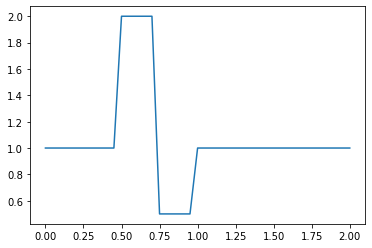

In [4]:
plt.plot(np.linspace(0, 2, nx), u);

In [11]:
#Update function as defined in equation above
def update(u, dt, dx, v, nx):
    nextu = np.zeros(nx)
    
    for i in range(nx):
        nextu[i] = u[i] + (v * dt / dx**2) * (u[(i+1) % nx] - 2 * u[i] + u[i-1])
        
    nextu, u = u, nextu
    
    return u

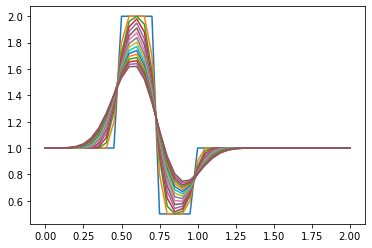

In [12]:
plt.plot(np.linspace(0, 2, nx), u)

for i in range(steps):
    u = update(u, dt, dx, v, nx)
    plt.plot(np.linspace(0, 2, nx), u)
